In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import matplotlib.pyplot as plt

In [2]:
num_data = 1000
num_epchos = 10000

In [5]:
noise = init.normal_(torch.FloatTensor(num_data,1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2) +3
y_noise = y + noise

In [6]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

In [8]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [11]:
loss_array = []
for i in range(num_epchos):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss)

In [18]:
loss_array[-1]

tensor(36.6503, grad_fn=<L1LossBackward>)

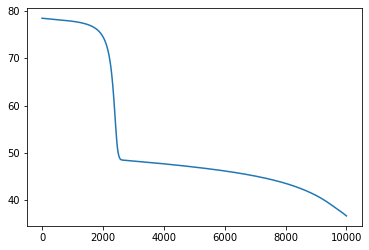

In [16]:
plt.plot(loss_array)
plt.show()